OrderedDict([('Entertainment', 1094), ('Music', 1080), ('Games', 667), ('No category', 532), ('Film', 342), ('People', 290), ('Comedy', 219), ('Education', 174), ('Howto', 136), ('News', 104), ('Sports', 89), ('Tech', 69), ('Autos', 33), ('Animals', 25), ('Shows', 19), ('Travel', 15), ('Nonprofit', 7)])
OrderedDict([('t', 521), ('m', 402), ('s', 384), ('c', 316), ('a', 305), ('b', 257), ('d', 240), ('p', 217), ('l', 216), ('k', 198), ('f', 182), ('g', 168), ('r', 161), ('j', 155), ('e', 151), ('h', 143), ('n', 133), ('w', 102), ('v', 100), ('i', 97), ('o', 91), ('u', 77), ('y', 54), ('z', 49), ('x', 14), ('q', 11)])


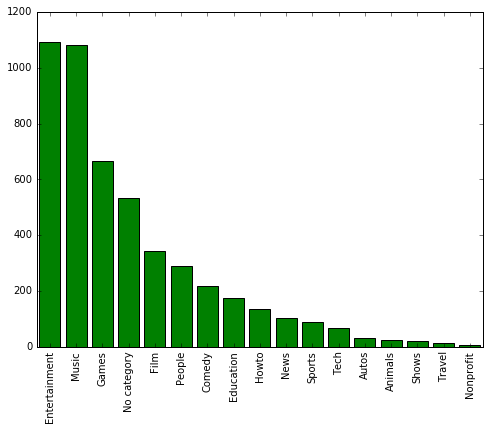

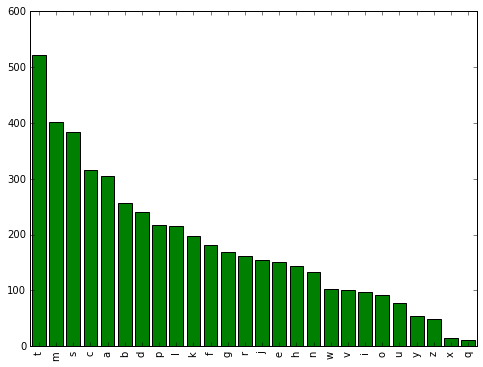

In [11]:
from numpy import *

% matplotlib inline

import matplotlib.pyplot as plt

from Orange.data import Table
import collections
from csv import DictReader
from collections import OrderedDict

preset=["Music",  "Sports", "People", "Education" ,"Shows", "Entertainment" ,"Games" ,"Comedy" ,"Film" ,"Howto", "News", "Tech", "Travel", "Animals", "Autos" ,"Nonprofit","No category"]

letters="a	b	c	d	e	f	g	h	i	j	k	l	m	n	o	p	q	r	s	t	u	v	w	x	y	z"
alphabet=letters.split("	")


reader = DictReader(open( "Top5000.csv" , "rt" , encoding="utf-8" ))

categories=OrderedDict()
letters=OrderedDict()

for row in reader :
    category=row["category"]
    original=row["name"]
    
    if original=='dummy_string':
        continue
        
    
    try:
        letter=original[0].lower()
        if category in categories:
            categories[category]+=1
        else:
            if category in preset:
                categories[category]=1

        if letter in letters:
            letters[letter]+=1
        elif letter in alphabet:
            letters[letter]=1
        else:
            pass
    except Exception as e:
        continue

categories["No category"]=532

categories=OrderedDict(sorted(categories.items(), key=lambda t: t[1],reverse=True))
letters=OrderedDict(sorted(letters.items(), key=lambda t: t[1],reverse=True))

print(categories)
print(letters)

catKeys=categories.keys()
catValues=categories.values()

x=range(len(catKeys))
plt.figure(figsize=(8, 6))
plt.bar(x, catValues, color="green", align="center")
plt.xlim(-0.5, len(preset)-0.5)
plt.xticks(x)

plt.gca().set_xticklabels(categories.keys(), rotation=90)



catKeys=letters.keys()
catValues=letters.values()

x=range(len(catKeys))
plt.figure(figsize=(8, 6))
plt.bar(x, catValues, color="green", align="center")
plt.xlim(-0.5, len(alphabet)-0.5)
plt.xticks(x)

plt.gca().set_xticklabels(letters.keys(), rotation=90)

